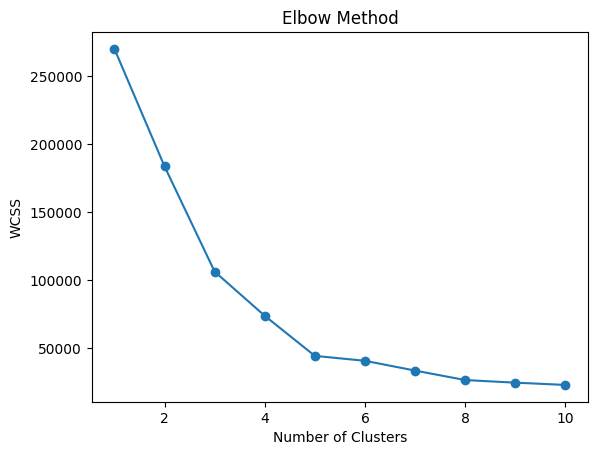

KMeans -> Silhouette: 0.553931997444648, Davies-Bouldin: 0.5725628995597082
Hierarchical -> Silhouette: 0.5529945955148897, Davies-Bouldin: 0.5782207452369454


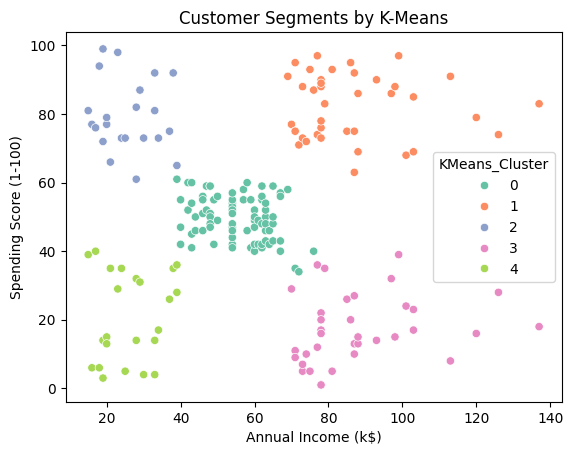

In [7]:
# import importatnt libraries; Here 'pandas & numpy' are used for data manipulation and numerical operation and 'sklearn' provides clustering algorithm
#and evaluation metrics
# matplotlib.pyplot and seaborn: For data visualization.
# KMeans, AgglomerativeClustering: Clustering algorithms from scikit-learn.
# silhouette_score, davies_bouldin_score: Metrics to evaluate clustering quality.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Loads the dataset from your local path.
# df.head() displays the first five rows to preview the data.

df = pd.read_csv(r"C:\Users\aashu\OneDrive\Documents\Mall_Customers.csv")
df.head()

# Preprocess and select features
# Selects only the relevant features for clustering: income and spending score.

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# use Elbow method to choose K
# wcss - Within-Cluster Sum of Squares, a measure of compactness.
# Loops through cluster counts from 1 to 10.
# init='k-means++': Smart centroid initialization to speed up convergence.
# inertia_: Total WCSS for each K.

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
# Plots WCSS vs. number of clusters to visually find the "elbow" point.

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means clustering
# Fits K-Means with 5 clusters (based on elbow plot).
# fit_predict: Fits the model and returns cluster labels.
# Adds the cluster labels to the original DataFrame.

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['KMeans_Cluster'] = kmeans_labels

# Apply Hierarchical clustering
# Uses Agglomerative Clustering with Ward linkage (minimizes variance).
# Assigns cluster labels and stores them in the DataFrame.

hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hier_labels = hierarchical.fit_predict(X)
df['Hierarchical_Cluster'] = hier_labels

# Silhouette_score: Measures how similar a point is to its own cluster vs. others (higher is better).
# Davies_bouldin_score: Measures average similarity between clusters (lower is better).

sil_kmeans = silhouette_score(X, kmeans_labels)
dbi_kmeans = davies_bouldin_score(X, kmeans_labels)
sil_hier = silhouette_score(X, hier_labels)
dbi_hier = davies_bouldin_score(X, hier_labels)

# Prints the evaluation metrics for both clustering methods.

print(f"KMeans -> Silhouette: {sil_kmeans}, Davies-Bouldin: {dbi_kmeans}")
print(f"Hierarchical -> Silhouette: {sil_hier}, Davies-Bouldin: {dbi_hier}")

# Creates a scatter plot of customers colored by their K-Means cluster.
# Helps visually interpret the segmentation.

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='Set2')
plt.title('Customer Segments by K-Means')
plt.show()

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


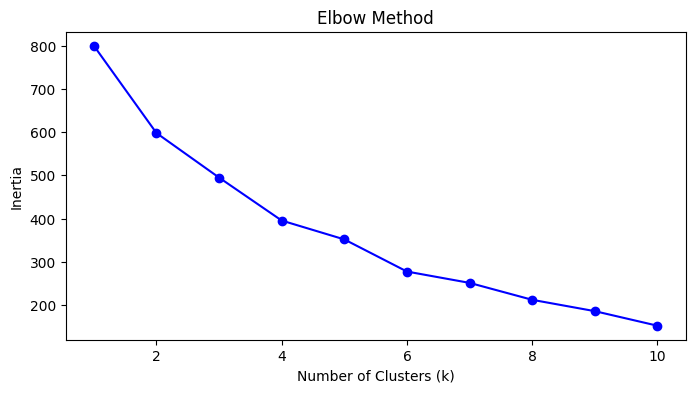

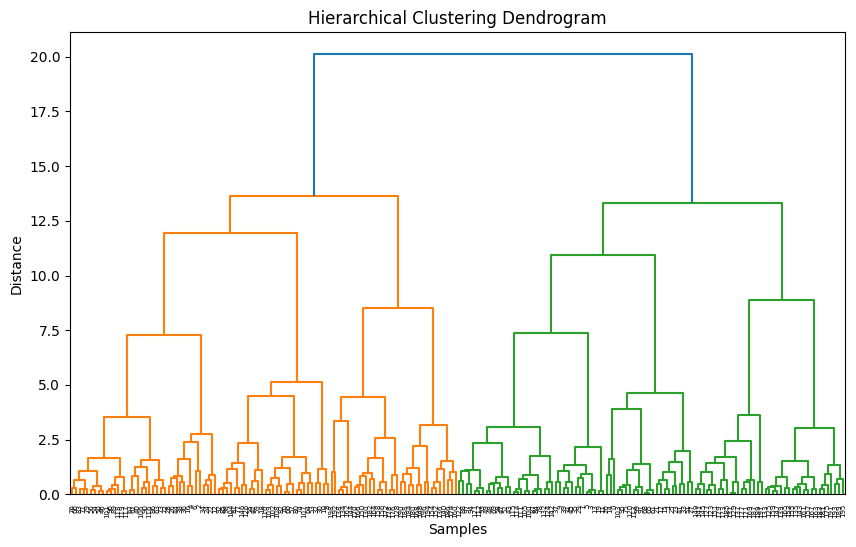

K-Means Silhouette Score: 0.27191023466188324
K-Means Davies–Bouldin Index: 1.181091452406171
Hierarchical Silhouette Score: 0.28699413201651747
Hierarchical Davies–Bouldin Index: 1.2197730790225612


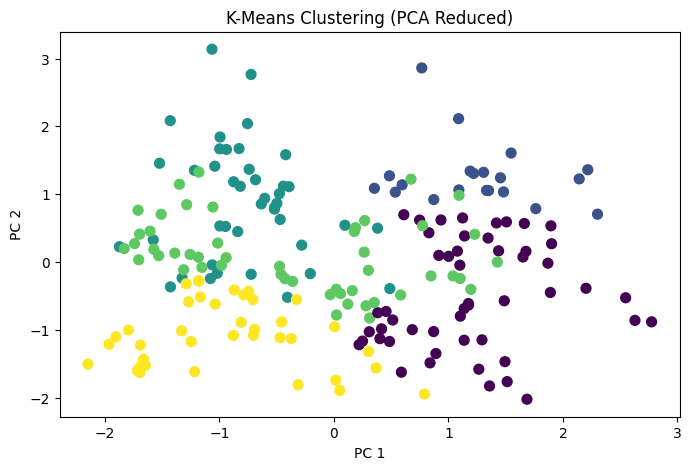

In [3]:
# impoprt Ipmortant libraries
# pandas and numpy: For data manipulation and numerical operations.
# matplotlib.pyplot and seaborn: For plotting graphs and visualizations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KMeans, AgglomerativeClustering Clustering algorithms.
# Silhouette_score, Davies_bouldin_score: Metrics to evaluate clustering quality.
# dendrogram, linkage: For hierarchical clustering visualization.
# StandardScaler: Standardizes features by removing the mean and scaling to unit variance.

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Loads the dataset from the specified path.

data = pd.read_csv(r"C:\Users\aarti\OneDrive\Documents\Mall_Customers.csv")

# Displays the first few rows and summary info (column types, nulls, etc.)

print(data.head())
# Basic information
print(data.info())

# Drop non-numeric identifiers
# Removes the CustomerID column since it's just an identifier.
data = data.drop(['CustomerID'], axis=1)

# Converts categorical gender into numeric format for modeling.

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Feature scaling
# Standardizes the data so that each feature has mean 0 and variance 1.

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Runs K-Means for k=1 to 10 and stores the inertia (sum of squared distances to cluster centers).

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))

# Plots the elbow curve to help choose the optimal number of clusters.
plt.plot(range(1, 11), inertia, 'bo-')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Applies K-Means with the chosen number of clusters and stores the cluster labels.

k_optimal = 5  # assume elbow at k=5, adjust based on plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
k_labels = kmeans.fit_predict(scaled_data)

# Computes linkage matrix using Ward’s method (minimizes variance within clusters).

linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 6))

# Plots the dendrogram to visualize the hierarchy of clusters.

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Performs agglomerative clustering and assigns cluster labels.

hc = AgglomerativeClustering(n_clusters=k_optimal)
hc_labels = hc.fit_predict(scaled_data)

# Silhouette Score: Measures how similar a point is to its own cluster vs. others (higher is better).
# Davies–Bouldin Index: Measures intra-cluster similarity and inter-cluster differences (lower is better).

print("K-Means Silhouette Score:", silhouette_score(scaled_data, k_labels))
print("K-Means Davies–Bouldin Index:", davies_bouldin_score(scaled_data, k_labels))

print("Hierarchical Silhouette Score:", silhouette_score(scaled_data, hc_labels))
print("Hierarchical Davies–Bouldin Index:", davies_bouldin_score(scaled_data, hc_labels))

# Reduces the dataset to 2D for visualization while preserving variance.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 5))

# Plots the clusters in 2D space using PCA components.

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=k_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

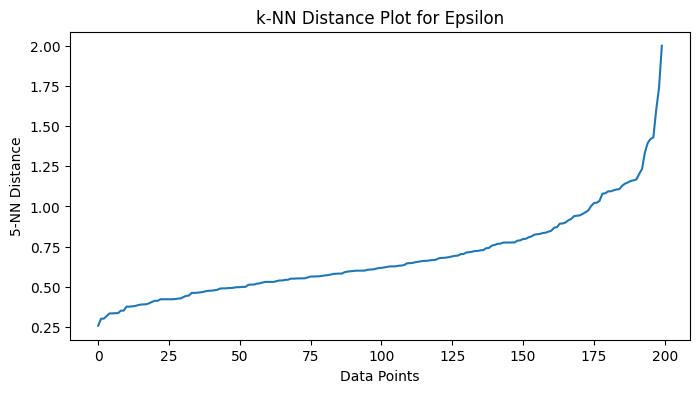

DBSCAN Silhouette Score: 0.2776035125578272
DBSCAN Davies–Bouldin Index: 1.6116938570457684
                  Gender        Age  Annual Income (k$)  \
KMeans_Cluster                                            
0               0.490196  56.470588           46.098039   
1               0.000000  39.500000           85.150000   
2               0.000000  28.690476           60.904762   
3               1.000000  37.897959           82.122449   
4               1.000000  27.315789           38.842105   

                Spending Score (1-100)  HC_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                                      
0                            39.313725    3.411765        0.490196  
1                            14.050000    2.200000        0.000000  
2                            70.238095    0.619048        0.000000  
3                            54.448980    1.428571        1.000000  
4                            56.210526    0.552632        1.000000  


In [5]:
# DBSCAN: Density-based clustering algorithm that groups together closely packed points and identifies outliers as noise.
# NearestNeighbors: For identifying closest neighbors of each point, which helps estimate the eps (epsilon) parameter.

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Determine optimal epsilon using k-NN distance plot
# Initializes the neighbor search model for 5 nearest neighbors.
neighbors = NearestNeighbors(n_neighbors=5)

# Fits the model to the scaled data for neighbor calculations.
neighbors_fit = neighbors.fit(scaled_data)

# Takes the 5th neighbor (at index 4) for each point and sorts those distances. This forms the curve for the elbow heuristic in DBSCAN.
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances[:, 4], axis=0)
# Plots the sorted 5th neighbor distances to identify the “elbow” or sharp jump—this suggests a good value for eps (distance threshold for forming
# clusters)
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('k-NN Distance Plot for Epsilon')
plt.xlabel('Data Points')
plt.ylabel('5-NN Distance')
plt.show()

# nitializes DBSCAN with your chosen eps and min_samples. Here:
# eps=1.8: Maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples=5: Minimum number of points to form a dense region.
dbscan = DBSCAN(eps=1.8, min_samples=5)

# Applies DBSCAN to the data, returning cluster labels (-1 for noise points).
db_labels = dbscan.fit_predict(scaled_data)

# Filters out noise points (with label -1) so evaluations focus on formed clusters.
valid_idx = db_labels != -1

# Silhouette Score: Measures cluster tightness and separation (higher = better).
# Davies–Bouldin Index: Evaluates average similarity between clusters (lower = better).
# Note: Calculated only on non-noise points.

print("DBSCAN Silhouette Score:", silhouette_score(scaled_data[valid_idx], db_labels[valid_idx]))
print("DBSCAN Davies–Bouldin Index:", davies_bouldin_score(scaled_data[valid_idx], db_labels[valid_idx]))

# Appends the cluster labels from KMeans, Hierarchical, and DBSCAN to your original dataframe for comparison or profiling.
data['KMeans_Cluster'] = k_labels
data['HC_Cluster'] = hc_labels
data['DBSCAN_Cluster'] = db_labels

# Groups data by KMeans cluster and computes the mean for each feature to understand segment characteristics.
cluster_profiles = data.groupby('KMeans_Cluster').mean()
print(cluster_profiles)